<a href="https://colab.research.google.com/github/Bheady23/MLA_CMB/blob/main/FinalProject_Classification_CMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Final Project Classification

**Chris Burkhead**

##Part 1. Logistic Regression

**Standard Imports**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Specific Imports**

In [ ]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

**Imports building the transformers, the pipeline, and splitting the data.**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

**Imports for Evaluating the models performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

**Connecting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**2. Logistic Regression - Aquire Data**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/default_of_credit_card_clients.csv')

This data set contains over 30000 entries of client's credit histories and whether or not they defaulted on their next payment after making a series of payments. It uses a variety of attributes including age, gender, education level, payment history and amount. Using Logistic and other classfication ML Models I will try and determine whether this data set can make accurate predications as to whether or not someone will default on their next payment.  

**3. Statistics and visual explorations**

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.rename(columns={'default payment next month':'default_payment_next_month'},inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
13293,13294,320000,1,1,1,46,0,-1,-1,-1,...,5238,8594,3743,9061,7935,5238,8594,3743,12820,0
27101,27102,300000,1,2,1,45,1,-1,0,0,...,233586,234661,233304,244500,8613,8000,11000,8093,6399,1
2734,2735,240000,2,2,2,47,-2,-2,-2,-2,...,10264,316,9801,21359,2762,10318,316,17677,31600,0
293,294,10000,1,2,2,27,0,0,2,0,...,9901,9963,10182,3507,0,500,370,393,700,1
28759,28760,200000,2,2,1,33,0,0,0,0,...,16992,8967,8494,3000,2000,5000,2000,1000,2000,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
default =df.default_payment_next_month.groupby(df.default_payment_next_month).count()

<Axes: ylabel='default_payment_next_month'>

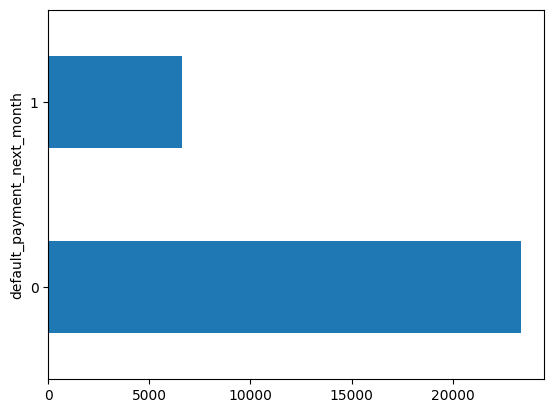

In [ ]:

default.plot(kind='barh')

For this data set 1 means the client did default on their next payment and a zero means they did not. It appears this set contains almost 5 times as many instances as people not defaulting than defaulting, this could make it more difficult for our models to predict defaults due to an imbalanced data set. 

In [ ]:
plotDF = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','default_payment_next_month']]

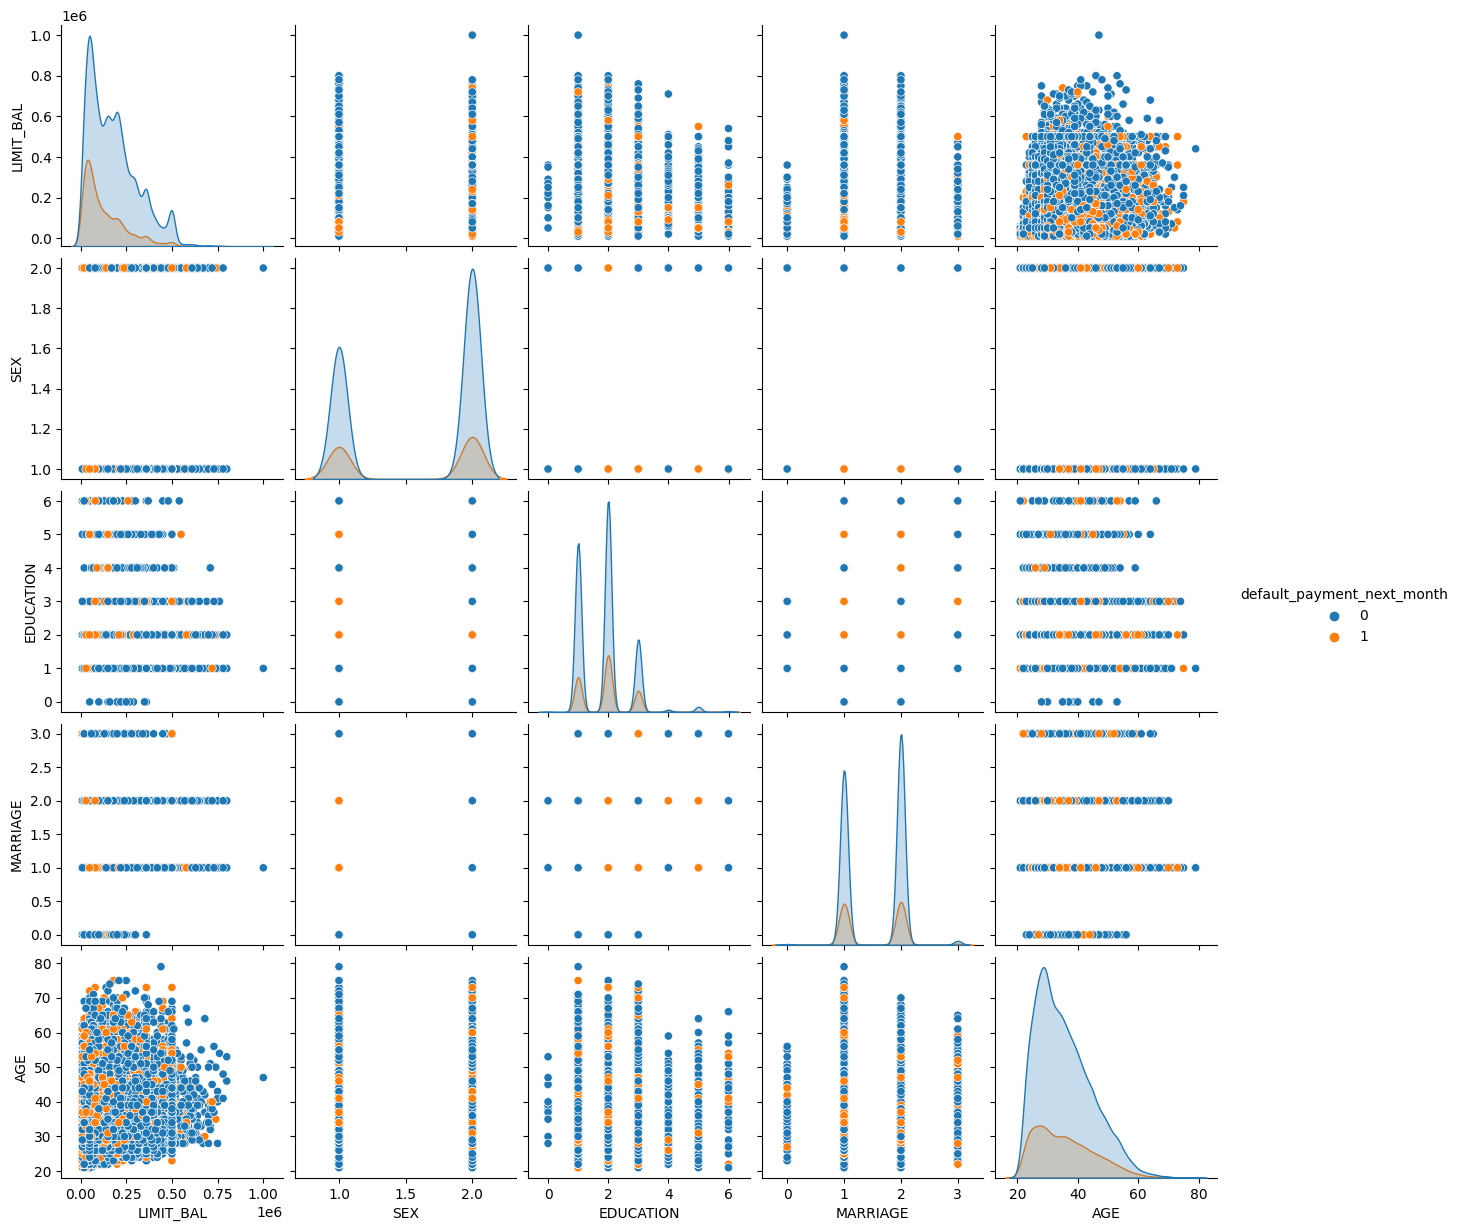

In [ ]:
sns.pairplot(data=plotDF, diag_kind='kde', hue='default_payment_next_month')

I chose to do a pairplot against just the status attributes to see if their were any patterns that emerged. What's struck me right away is that it appears defaulting on a payment rises sharply during a person's 20's, peaking right before turning 30 and then has a gradual decent until it's almost non-existent for people over 60. It also appears that people with lower credit limits are more likely to default than people with larger credit limits. Let's run the correlation coeificent for default payments against all the other attributes to see if their are any positive correlations. 

In [ ]:
df.corrwith(df['default_payment_next_month'])

ID                           -0.013952
LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default_payment_next_month    1.000000
dtype: float64

Turns out the status attributes have very little bearing on whether or note a person defaults on their next payment, their payment history appears to correlate the most, but even then those are very weak correlations, which doesn't bode well for our models prediction abilities. 

**4. Splittting Data into Train/test**


In [ ]:
X = df.iloc[:,1:-1]
y = df['default_payment_next_month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=24)

**5. Building pipeline**

In [ ]:
num_attribs = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
col_transform = ColumnTransformer(transformers=[('num',MinMaxScaler(), num_attribs)])


In [ ]:
pipeline = Pipeline([ ('transform', col_transform), ('mlr', LogisticRegression(max_iter=1000))])
pipeline


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['LIMIT_BAL', 'SEX',
                                                   'EDUCATION', 'MARRIAGE',
                                                   'AGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

**6. Executing the Model**

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['LIMIT_BAL', 'SEX',
                                                   'EDUCATION', 'MARRIAGE',
                                                   'AGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

**7. Evaluting the model**

In [ ]:
y_pred = pipeline.predict(X_test)

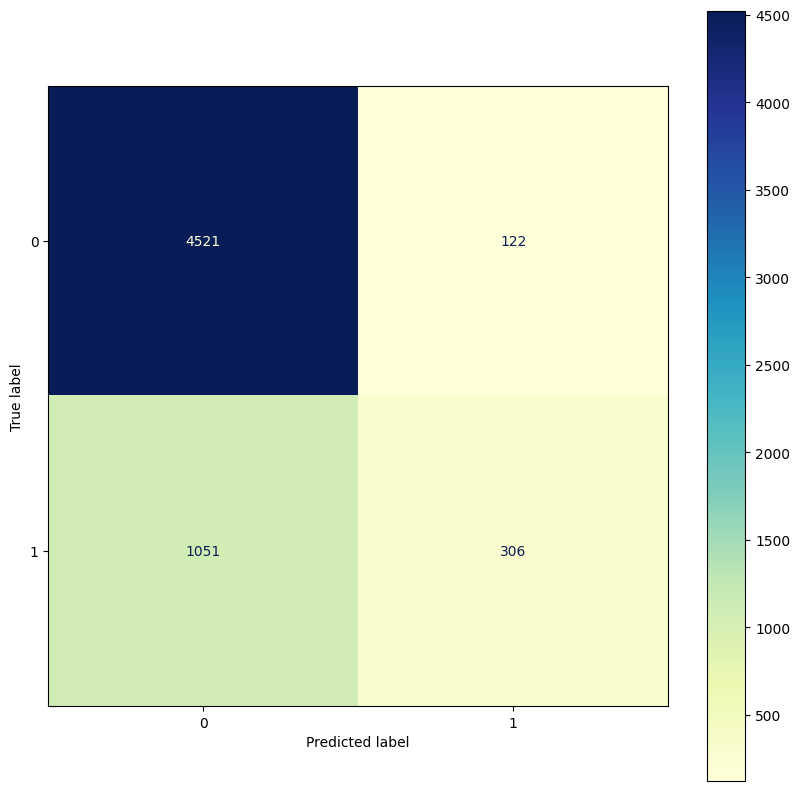

In [ ]:

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize = (10,10))
disp.plot(ax=ax, cmap='YlGnBu')

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      5572
           1       0.23      0.71      0.34       428

    accuracy                           0.80      6000
   macro avg       0.60      0.76      0.61      6000
weighted avg       0.92      0.80      0.85      6000



The Logistic Regression Model does a good job of misleading us that it can predict when a person will defualt on their next payment. We get an accurracy score of 80%, which isn't terrible, but when you look at the details of how it got to 80% you will see that it is because it is really good at predicting when a person will not default on their next payment, where it achieved an f1 score of 89%. But when predicting if a person will default on their next payment it achieved an f1 score of 34%, that's unacceptable.  

##Part 2. Decision Trees

Steps 1-3 have already been completed above, so with this model we can move on Step 4.

**4. Splitting into Train/Test**

In [ ]:
X = df.iloc[:,1:-1]
y = df['default_payment_next_month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=24)

**5. Building the Pipeline**

In [ ]:
num_attribs = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
col_transform = ColumnTransformer(transformers=[('num',MinMaxScaler(), num_attribs)])

In [ ]:

pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

**6. Executing the Model**

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['LIMIT_BAL', 'SEX',
                                                   'EDUCATION', 'MARRIAGE',
                                                   'AGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

**7. Evaluating the Model**

In [ ]:
y_pred = pipeline.predict(X_test)

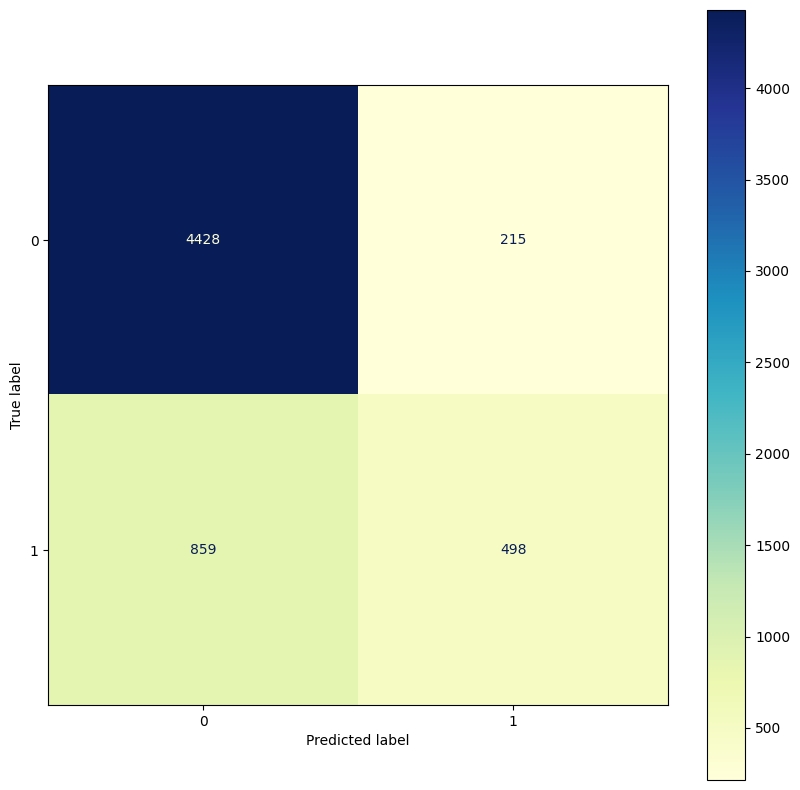

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize = (10,10))
disp.plot(ax=ax, cmap='YlGnBu')

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5287
           1       0.37      0.70      0.48       713

    accuracy                           0.82      6000
   macro avg       0.66      0.77      0.69      6000
weighted avg       0.88      0.82      0.84      6000



Using the Decision Tree model we see some very modest gains in being able to predict whether or not a client will default on their next payment. Compared to Logistic regression our f1 score went up from 80%  to 82%, while that doesn't seem like much, this increase was primarily driven by out precision score for predicting defaults went up 13%, thats a significant increase. Still not where we need it to be to consider this model acceptable for predicting when a person will default on a payment. 

But lets implement a gridsearch pipeline of the Decision tree model and see if we can get even more improvement. 

In [ ]:
parameters = {'decision_tree__criterion':['gini','entropy'],
              'decision_tree__max_depth': (5,10),
              'decision_tree__min_samples_split':range(5, 10),
              'decision_tree__min_samples_leaf':range(1, 5),
              } 

In [ ]:
grid_pipeline = GridSearchCV(pipeline, param_grid=parameters)

In [ ]:
grid_pipeline

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6'])])),
                                       ('decision_tree',
                                        DecisionTreeClassifier(max_depth=5))]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': (5, 10),
                         'decision_tree__min_samples_leaf': range(1, 5),
                         'decision_tree__min_samples_split': range(5, 10)})

In [ ]:
grid_pipeline.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6'])])),
                                       ('decision_tree',
                                        DecisionTreeClassifier(max_depth=5))]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': (5, 10),
                         'decision_tree__min_samples_leaf': range(1, 5),
                         'decision_tree__min_samples_split': range(5, 10)})

In [ ]:
grid_pipeline.best_params_

{'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': 5,
 'decision_tree__min_samples_leaf': 2,
 'decision_tree__min_samples_split': 6}

Now that we have the best parameters for the Decision Tree from the gridpipeline, I'll run those parameters through our original pipeline and then rerun the confusin Matrix and classification report to see if our scores improve.

In [ ]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=6))
                     ])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['LIMIT_BAL', 'SEX',
                                                   'EDUCATION', 'MARRIAGE',
                                                   'AGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6'])])),
                ('decision_tree',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=6))])

In [ ]:
y_pred = pipeline.predict(X_test)

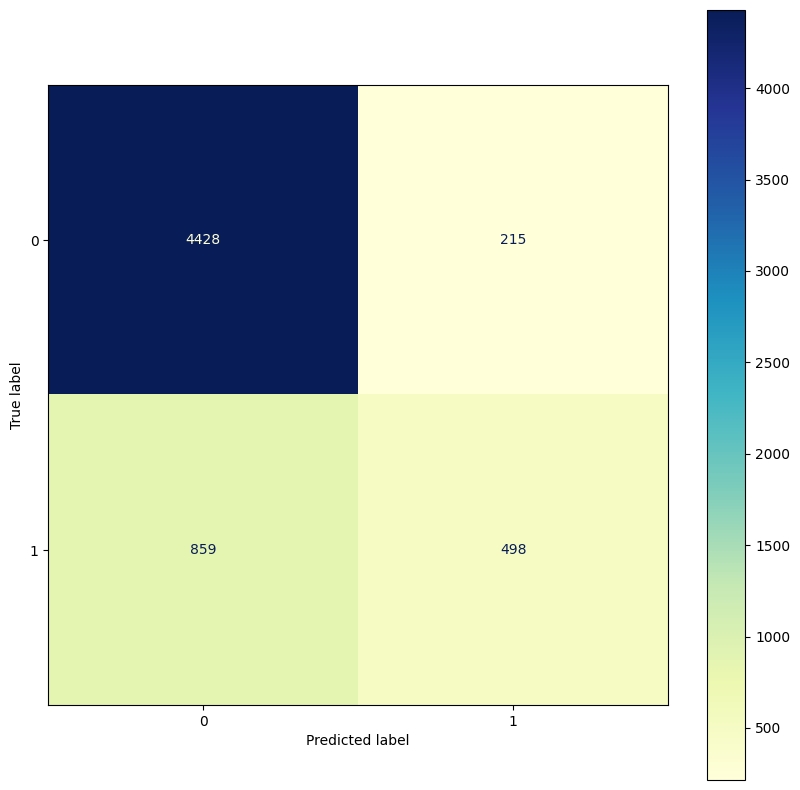

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize = (10,10))
disp.plot(ax=ax, cmap='YlGnBu')

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5287
           1       0.37      0.70      0.48       713

    accuracy                           0.82      6000
   macro avg       0.66      0.77      0.69      6000
weighted avg       0.88      0.82      0.84      6000



Unfortunately we got no improvement using the gridsearch pipeline best parameters on the Decision Tree model, infact we got the same exact results as we did when we ran the decision tree without gridsearch. 

##Conclusion

Logistic Regression and Decision Tree models do not work well with this data set to make accurate predictions on whether or not a person will default on their next payment. Even though all models had accuracy scores around 80%, those scores were misleading due to the lopsidedness of how well the model's predicted that people would not default on their next payment, compared to how terribly it did predicting people that would default. It is hard to decern if the models did poorly due to how imbalanced the data set was between non-default and default, regardless none of them did well enough to say they would be adequate predictors. But the Decision Tree model did do a slightly better job than the Logistic Regression model in making accurate predictions. 